In [1]:
import pandas as pd
import json 

In [38]:
data =[]
with open('customersdata.json') as datafile:
    for values in datafile:
        data.append(values)

In [321]:
df = pd.read_json('customersdata.json',lines = True)


In [322]:
df.head()

,customer,fraudulent,orders,paymentMethods,transactions
0,"{'customerEmail': 'josephhoward@yahoo.com', 'c...",False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...",True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,"{'customerEmail': 'andersonwilliam@yahoo.com',...",False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,"{'customerEmail': 'rubenjuarez@yahoo.com', 'cu...",False,"[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,"{'customerEmail': 'uchen@malone.com', 'custome...",True,"[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."


In [323]:
df_customer =pd.DataFrame(df['customer'].tolist())

In [324]:
df_customer.head()

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375
3,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",slovx60t0i558may4ks0,rubenjuarez@yahoo.com,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,670.664.8168x94985
4,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",j0pd24k5h8dl2fqu0cz4,uchen@malone.com,196.89.235.192,1-981-877-0870


In [325]:
def flatten(value):
    flatten_values = []
    for data in value:
        for values in data:
            flatten_values.append(values)
    return flatten_values
            

In [326]:
df_trans = list(df['transactions'])

In [333]:
df_transcations = pd.DataFrame(flatten(list(df['transactions'])))


In [369]:
# df_transcations['transactionFailed'] = pd.get_dummies(df_transcations['transactionFailed'])
df_transcations.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId
0,vjbdvd,wt07xm68b,18,1,a9lcj51r
1,yp6x27,wt07xm68b,26,1,y4wcv03i
2,nlghpa,41ug157xz,45,1,5mi94sfw
3,uw0eeb,41ug157xz,23,1,br8ba1nu
4,bn44oh,y3xp697jx,43,0,a33145ss


In [335]:
df_payment = pd.DataFrame(flatten(list(df['paymentMethods'])))
df_payment.head()

,paymentMethodId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
0,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card
1,y3xp697jx,Solace Banks,VISA 16 digit,True,bitcoin
2,6krszxc05,Vertex Bancorp,VISA 16 digit,False,card
3,5z1szj2he,His Majesty Bank Corp.,Diners Club / Carte Blanche,False,card
4,m52tx8e1s,Vertex Bancorp,Mastercard,False,card


In [336]:
df_order = pd.DataFrame([])
df_od = pd.Series([])
for i in range(len(df)):
    for j in range (len(df.iloc[i]["orders"])):
        df_od['fraudulend'] = df.iloc[i]['fraudulent']
        df_od['customerEmail'] = df.iloc[i]['customer']['customerEmail']
        df_od['orderId'] = df.iloc[i]["orders"][j]['orderId']
#         print(df_od['orderId'])
        df_order = df_order.append(df_od,ignore_index=True)
        
        

In [337]:
df_order.head()

,customerEmail,fraudulend,orderId
0,josephhoward@yahoo.com,0.0,vjbdvd
1,josephhoward@yahoo.com,0.0,yp6x27
2,evansjeffery@yahoo.com,1.0,nlghpa
3,evansjeffery@yahoo.com,1.0,uw0eeb
4,evansjeffery@yahoo.com,1.0,bn44oh


In [281]:
df_order.shape

(478, 3)

In [282]:
df_ord = pd.DataFrame(flatten(list(df['orders'])))


In [285]:
orders = pd.merge(df_ord,df_order,on='orderId',how = 'left')

In [286]:
orders.head()

,orderAmount,orderId,orderShippingAddress,orderState,customerEmail,fraudulend
0,18,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending,josephhoward@yahoo.com,0.0
1,26,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,josephhoward@yahoo.com,0.0
2,45,nlghpa,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,evansjeffery@yahoo.com,1.0
3,23,uw0eeb,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,evansjeffery@yahoo.com,1.0
4,43,bn44oh,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,evansjeffery@yahoo.com,1.0


In [287]:
df_ord.shape

(478, 4)

In [288]:
order_customer = pd.merge(orders,df_customer,on='customerEmail',how = 'left')

In [291]:
order_customer.head()

,orderAmount,orderId,orderShippingAddress,orderState,customerEmail,fraudulend,customerBillingAddress,customerDevice,customerIPAddress,customerPhone
0,18,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending,josephhoward@yahoo.com,0.0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,8.129.104.40,400-108-5415
1,26,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,josephhoward@yahoo.com,0.0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,8.129.104.40,400-108-5415
2,45,nlghpa,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,evansjeffery@yahoo.com,1.0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,219.173.211.202,1-788-091-7546
3,23,uw0eeb,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,evansjeffery@yahoo.com,1.0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,219.173.211.202,1-788-091-7546
4,43,bn44oh,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,evansjeffery@yahoo.com,1.0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,219.173.211.202,1-788-091-7546


In [295]:
transcations_payment = pd.merge(df_transcations,df_payment,on ='paymentMethodId',how ='left')

In [296]:
transcations_payment.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
0,vjbdvd,wt07xm68b,18,False,a9lcj51r,Citizens First Banks,JCB 16 digit,True,card
1,yp6x27,wt07xm68b,26,False,y4wcv03i,Citizens First Banks,JCB 16 digit,True,card
2,nlghpa,41ug157xz,45,False,5mi94sfw,Bastion Banks,American Express,False,bitcoin
3,uw0eeb,41ug157xz,23,False,br8ba1nu,Bastion Banks,American Express,False,bitcoin
4,bn44oh,y3xp697jx,43,True,a33145ss,Solace Banks,VISA 16 digit,True,bitcoin


In [297]:
complete = pd.merge(order_customer,transcations_payment,on='orderId',how = 'left')

In [316]:
print(complete.shape)
complete.head()


(819, 18)


,orderAmount,orderId,orderShippingAddress,orderState,customerEmail,fraudulend,customerBillingAddress,customerDevice,customerIPAddress,customerPhone,paymentMethodId,transactionAmount,transactionFailed,transactionId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
0,18,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending,josephhoward@yahoo.com,0.0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,8.129.104.40,400-108-5415,wt07xm68b,18,False,a9lcj51r,Citizens First Banks,JCB 16 digit,True,card
1,26,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,josephhoward@yahoo.com,0.0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,8.129.104.40,400-108-5415,wt07xm68b,26,False,y4wcv03i,Citizens First Banks,JCB 16 digit,True,card
2,45,nlghpa,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,evansjeffery@yahoo.com,1.0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,219.173.211.202,1-788-091-7546,41ug157xz,45,False,5mi94sfw,Bastion Banks,American Express,False,bitcoin
3,23,uw0eeb,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,evansjeffery@yahoo.com,1.0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,219.173.211.202,1-788-091-7546,41ug157xz,23,False,br8ba1nu,Bastion Banks,American Express,False,bitcoin
4,43,bn44oh,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,evansjeffery@yahoo.com,1.0,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,219.173.211.202,1-788-091-7546,y3xp697jx,43,True,a33145ss,Solace Banks,VISA 16 digit,True,bitcoin


Text(0.5, 1.0, 'Class Distributions \n (0:Fraud || 1: No Fraud)')

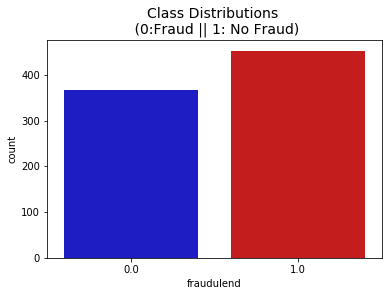

In [371]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('fraudulend', data=complete, palette=colors)
plt.title('Class Distributions \n (0:Fraud || 1: No Fraud)', fontsize=14)

Text(0.5, 1.0, 'Plot for value counts of Payment Method Provider')

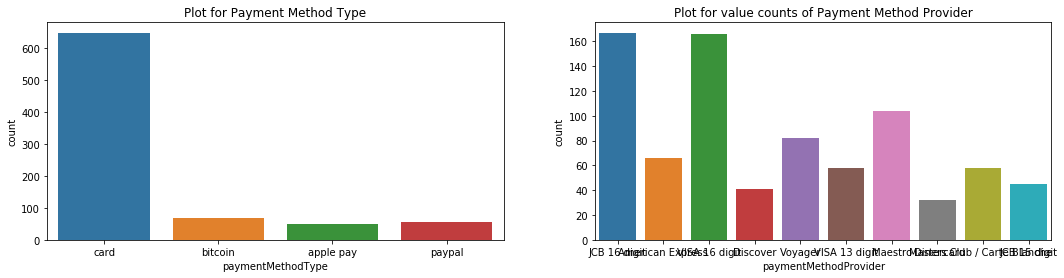

In [380]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.countplot(complete['paymentMethodType'],ax = ax[0])
ax[0].set_title('Plot for Payment Method Type')

sns.countplot(complete['paymentMethodProvider'],ax=ax[1])
ax[1].set_title('Plot for value counts of Payment Method Provider')
# complete['paymentMethodType'].value_counts().plot(kind= 'bar')

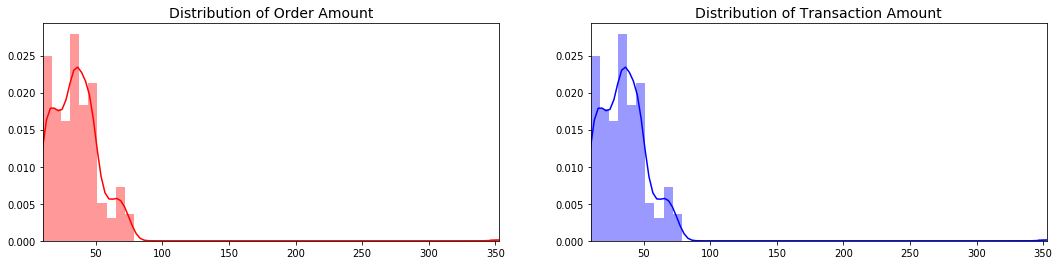

In [364]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = complete['orderAmount'].values
time_val = complete['transactionAmount'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Order Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

[Text(0, 0.5, 'Order Amount'), Text(0.5, 0, 'Fraudulend')]

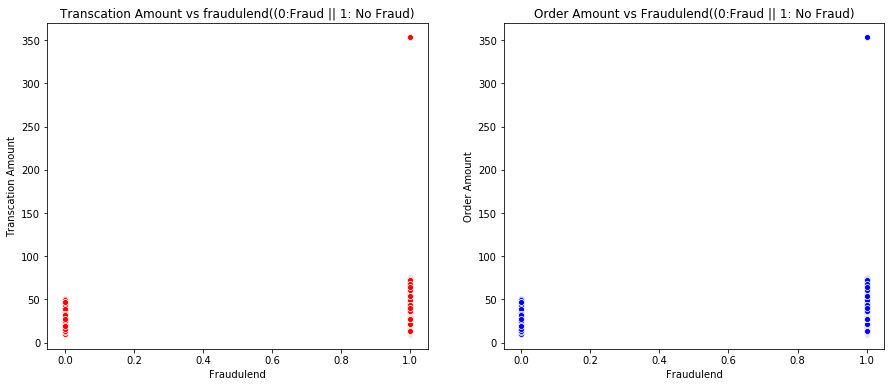

In [406]:
fig ,ax = plt.subplots(1,2,figsize =(15,6))
sns.scatterplot(complete['fraudulend'],complete['transactionAmount'],ax=ax[0],color='r')
ax[0].set_title('Transcation Amount vs fraudulend((0:Fraud || 1: No Fraud)')
ax[0].set(xlabel='Fraudulend',ylabel='Transcation Amount')
sns.scatterplot(complete['fraudulend'],complete['orderAmount'],ax=ax[1],color ='b')
ax[1].set_title('Order Amount vs Fraudulend((0:Fraud || 1: No Fraud)')
ax[1].set(xlabel='Fraudulend',ylabel='Order Amount')

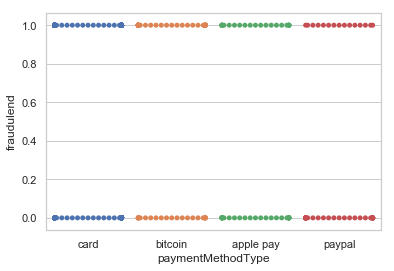

In [442]:
# fig,ax = plt.subplots(1,1,figsize =(18,10))
sns.swarmplot(complete['paymentMethodType'],complete['fraudulend'])


In [315]:
complete.isnull().sum()

orderAmount                         0
orderId                             0
orderShippingAddress                0
orderState                          0
customerEmail                       0
fraudulend                          0
customerBillingAddress              0
customerDevice                      0
customerIPAddress                   0
customerPhone                       0
paymentMethodId                     0
transactionAmount                   0
transactionFailed                   0
transactionId                       0
paymentMethodIssuer                 0
paymentMethodProvider               0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
dtype: int64

In [348]:
complete.describe()

,orderAmount,fraudulend,transactionAmount
count,819.000000,819.000000,819.000000
mean,35.147741,0.553114,35.147741
std,19.640072,0.497475,19.640072
min,10.000000,0.000000,10.000000
25%,22.000000,0.000000,22.000000
50%,34.000000,1.000000,34.000000
75%,46.000000,1.000000,46.000000
max,353.000000,1.000000,353.000000


In [317]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [339]:
complete['fraudulend'].value_counts()

1.0    453
0.0    366
Name: fraudulend, dtype: int64

In [340]:
complete['orderState'].value_counts()

fulfilled    691
failed        84
pending       44
Name: orderState, dtype: int64

In [346]:

print('Mean transaction Amount',complete['transactionAmount'].mean())

print('Max Amount',complete['transactionAmount'].max())
print('Min Amount',complete['transactionAmount'].min())

Mean transaction Amount 35.14774114774115
Max Amount 353
Min Amount 10


In [347]:
complete['transactionAmount'].corr(complete['fraudulend'])
#The correlation between the transaction Amount and fraudulend amount is very less, so fraudulend dosen't depend much on the transactionAmount

0.27928076569211435

In [350]:
complete['orderAmount'].corr(complete['fraudulend'])
#The correlation between the orderAmount and the fraudulend amount is very less 

0.27928076569211435

In [351]:
complete.corr()

,orderAmount,fraudulend,transactionAmount,transactionFailed,paymentMethodRegistrationFailure
orderAmount,1.000000,0.279281,1.000000,0.011821,0.027747
fraudulend,0.279281,1.000000,0.279281,-0.079607,-0.068362
transactionAmount,1.000000,0.279281,1.000000,0.011821,0.027747
transactionFailed,0.011821,-0.079607,0.011821,1.000000,0.009077
paymentMethodRegistrationFailure,0.027747,-0.068362,0.027747,0.009077,1.000000


Text(0.5, 1.0, 'Correlation plot')

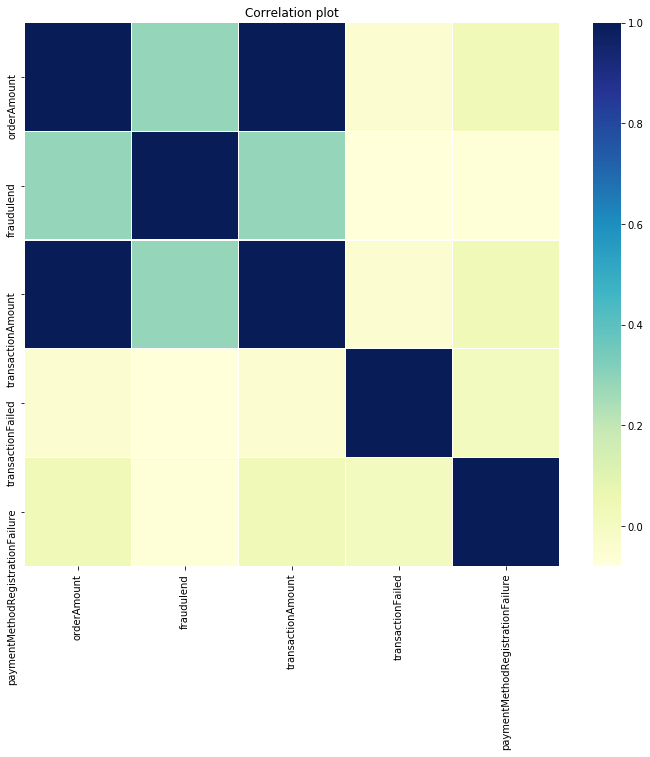

In [353]:
correl = complete.corr(method= 'spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correl, ax=ax, cmap="YlGnBu", linewidths=0.1)
plt.title('Correlation plot')

In [447]:
final_df = complete[['orderAmount','orderState','fraudulend','transactionAmount','transactionFailed','paymentMethodIssuer','paymentMethodType','paymentMethodRegistrationFailure','paymentMethodProvider']]

## Building machine learning models 

In [449]:
final_df = pd.get_dummies(final_df)

In [474]:
print(final_df.shape)
final_df.head()
final_df['transactionFailed'] = pd.get_dummies(final_df['transactionFailed'])
final_df['paymentMethodRegistrationFailure'] = pd.get_dummies(final_df['paymentMethodRegistrationFailure'])

(819, 41)


In [475]:
Target = final_df['fraudulend']
X = final_df.drop('fraudulend',axis =1 )
X.shape

(819, 40)

In [476]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Target,test_size =20,random_state =12)

In [477]:
X_train.shape

(799, 40)

### LogisticRegression

In [511]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [520]:
LR.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [539]:
pred = LR.predict(X_train)
accuracy_score(Y_train,pred)

0.7747183979974969

In [540]:
predss = LR.predict(X_test)
print('Accuracy_score is  ',accuracy_score(Y_test,predss))
print('\n')
print('Confusion_matrix')
print(confusion_matrix(Y_test,predss))


Accuracy_score is   0.65


Confusion_matrix
[[6 3]
 [4 7]]


In [523]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95         9
         1.0       1.00      0.91      0.95        11

   micro avg       0.95      0.95      0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



# Random forest classifier


In [501]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [485]:
rf = RandomForestClassifier()

In [488]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### prediction on training data


In [524]:
preds = rf.predict(X_train)
print('Accuracy of Training Data is')
accuracy_score(Y_train,preds)

Accuracy score of Training Data is


0.9949937421777222

In [514]:
preds = rf.predict(X_test)
print('Accuracy of  ',accuracy_score(Y_test,preds))
print('\n')
print('Confusion_matrix')
print(confusion_matrix(Y_test,preds))


Accuracy_score is   0.95


Confusion_matrix
[[ 9  0]
 [ 1 10]]


In [517]:
print('classificaton report')
print(classification_report(Y_test,preds))

classificaton report
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95         9
         1.0       1.00      0.91      0.95        11

   micro avg       0.95      0.95      0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



In [533]:
df_important = pd.DataFrame(importance,index=X_train.columns,columns=['Importance'])

In [538]:
df_important.nlargest(5,'Importance')

,Importance
transactionAmount,0.198539
orderAmount,0.174870
paymentMethodIssuer_Her Majesty Trust,0.046586
paymentMethodIssuer_Rose Bancshares,0.037039
paymentMethodProvider_VISA 16 digit,0.034409


Logestic regression model has an accuracy of 75% for the training data and 65% on the test data 

Randomforest model has an accuracy of 99% for the training data and 95% on the unseen data.
Basic Randomforest model without any fine tuning has give an accuracy of 95%.
As the data sample was small if we perform any hyper parameter tuning it will try to overfit the data.


TransactionAmount is the most important feature which is being used in the model followed by the orderAmount